In [47]:
import Robot3D
import numpy as np
from Robot3D import robot_3link as Robot
from Robot3D import rand_object as Object
from Robot3D import workspace_limits
from Robot3D import workspace
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [39]:
robot = Robot()
obj = Object()


In [40]:
print(workspace_limits)

[[-0.6  0.6]
 [-0.6  0.6]
 [ 0.   0.9]]


In [41]:

def object_hasher(scene_obj, res = np.array([.01,.01,.01])):
    # This function takes a scene object and then outputs a list of occupied indexs of 
    # of the "workspace array"
    obj = scene_obj
    r = obj.radius
    
    min_arr = obj.curr_pos - r
    max_arr = obj.curr_pos + r
    min_ndx = np.zeros(min_arr.shape)
    max_ndx = np.zeros(max_arr.shape)
    for i in range(workspace_limits[:,0].shape[0]):
        if min_arr[i] < workspace_limits[i,0]:
            min_arr[i] = workspace_limits[i,0]
        if max_arr[i] > workspace_limits[i,1]:
            max_arr[i] = workspace_limits[i,1]
            
        range_ = workspace_limits[i,1] - workspace_limits[i,0]
        ndx_range = range_/res[i]
        print(ndx_range, range_)
        
        min_ndx[i] = np.round((ndx_range/range_) * (min_arr[i] - workspace_limits[i,0]))
        max_ndx[i] = np.round((ndx_range/range_) * (max_arr[i] - workspace_limits[i,0]))
            
    min_ndx = np.clip(min_ndx,0,120)
    max_ndx = np.clip(max_ndx,0,120)
    
    th_arr = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
    phi_arr = [np.pi/4, np.pi/2, 3*np.pi/2]
    
    for i,th in enumerate(th_arr.shape[0]):
        for j,phi in enumerate(phi_arr.shape[0]):
            point = obj.curr_pos + obj.radius * np.array([np.cos(phi)*np.cos(th),
                                                          np.coss(phi)*np.sin(th),
                                                          np.cos(phi)])
            
    
    
    

In [42]:
obj.curr_pos = np.array([0,0,0])
object_hasher(obj), obj.curr_pos + obj.radius, obj.radius

120.0 1.2
120.0 1.2
90.0 0.9


AttributeError: 'list' object has no attribute 'shape'

In [43]:
r = obj.radius
min_arr = obj.curr_pos - r
max_arr = obj.curr_pos + r
print(min_arr)
# min_arr[min_arr < workspace_limits[:,0]] = workspace_limits[min_arr < workspace_limits[:,0]]
for i,x in enumerate(workspace_limits[:,0]):
    if min_arr[i] < x:
        min_arr[i] = x
        
print(min_arr)

[-0.03 -0.03 -0.03]
[-0.03 -0.03  0.  ]


In [44]:
check = [[0,.01,-.01],[0,.01,0],[0,.01,.01],[0,0,.01],[0,-.01,.01],[0,-.01,0],[0,-.01,-.01],[0,0,-.01],[0,.01,-.01]]
r_int = int(obj.radius*100)
x = -1*obj.radius
r = obj.radius
coord_list = []
for i in range(-r_int,r_int+1):
    done = False
    y_start = np.sqrt(abs(r**2 - x**2))
    print(y_start)
    pos = np.array([x,y_start,0])
    n = 0
    while not done:
        n += 1
        r_i = y_start
        for j in range(1,len(check)):
            if np.round(np.linalg.norm(pos + check[j]),2) == np.round(r_i,2) and np.round(np.linalg.norm(pos + check[j-1]),2) > np.round(r_i,2):
                coord_list.append(pos+check[j])
                pos = pos + check[j]
                j = len(check) + 1
        
        if np.all(np.round(pos,2)==np.round(np.array([x,y_start,0]),2)):
            print('made it')
            done = True
        elif n > 1e3:
            done = True
            
    x = x + .01

print(len(coord_list))

0.0
made it
0.0223606797749979
0.0282842712474619
made it
0.03
made it
0.0282842712474619
made it
0.022360679774997894
5.703162734357589e-10
made it
6046


was not able to iterate over slice
was not able to iterate over slice


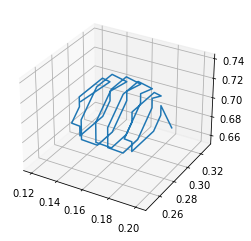

In [68]:
obj = Object()
check = [[0,.01,-.01],[0,.01,0],[0,.01,.01],[0,0,.01],[0,-.01,.01],[0,-.01,0],[0,-.01,-.01],[0,0,-.01],[0,.01,-.01]]
r_int = int(obj.radius*100)
r = obj.radius
pos = obj.curr_pos
x_c,y_c = pos[0],pos[1]
pos = pos - np.array([r,0,0])
x = pos[0]
coord_list = []
coord_list.append(pos)
for i in range(-r_int,r_int+1):
    y_start = np.sqrt(abs(r**2 - (x-x_c)**2)) + y_c
    start = np.array([pos[0],y_start,pos[2]])
    pos = start
    done = False
    n = 0
#     print('starting at ', start-obj.curr_pos)
    while not done:
        n += 1
        found_next = False
        for j in range(1,len(check)):
            check_loc = pos + check[j] - obj.curr_pos
            prev_loc = pos + check[j-1] - obj.curr_pos
            if np.round(np.linalg.norm(check_loc),2) == np.round(r,2) and np.round(np.linalg.norm(prev_loc),2) > np.round(r,2):
                coord_list.append(pos+check[j])
                pos = pos + check[j]
#                 print('found next r =', np.round(check_loc,2))
                j = len(check) + 1
                found_next = True
        
        if np.all(np.round(start,2) == np.round(pos,2)) and found_next:
#             print('made it')
            done = True
        elif not found_next:
            done = True
        elif n > 1000:
            done = True
    
    pos = np.array([pos[0]+.01, obj.curr_pos[1], obj.curr_pos[2]])
    x = pos[0]

    if not found_next:
        print("was not able to iterate over slice")
        
coord_list.append(pos)        
            
coord_list = np.array(coord_list)
xx = coord_list[:,0]
yy = coord_list[:,1]
zz = coord_list[:,2]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xx,yy,zz)
ax.axes.set_xlim3d(left=obj.curr_pos[0] - 1.5*r, right=obj.curr_pos[0] + 1.5*r) 
ax.axes.set_ylim3d(bottom=obj.curr_pos[1] - 1.5*r, top=obj.curr_pos[1] + 1.5*r) 
ax.axes.set_zlim3d(bottom=obj.curr_pos[2] - 1.5*r, top=obj.curr_pos[2] + 1.5*r);

(0.0, 0.8999999999999999)

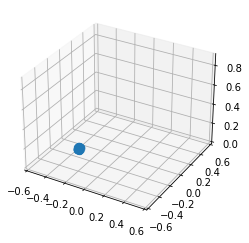

In [61]:
coord_list = np.array(coord_list)
xx = coord_list[:,0]
yy = coord_list[:,1]
zz = coord_list[:,2]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx,yy,zz)
ax.axes.set_xlim3d(left=-workspace, right=workspace) 
ax.axes.set_ylim3d(bottom=-workspace, top=workspace) 
ax.axes.set_zlim3d(bottom=0, top=workspace+.3) 